# Polymer chain configurations

In this notebook we:
- Import useful python libraries
- Define functions to:
    - Calculate root-mean-square end-to-end distance
    - Calculate a 2D Random walk
    - Plot a 2D random walk
- Look at the results
- Perform some statistical analysis on the results
- Set some extension work

## Import

In [1]:
import numpy as np  # This lets us do maths
from matplotlib import pyplot as plt  # This lets us plot things

## Define our functions

In [2]:
def calculate_rms_dist(n,l=1):
    """ Returns the root mean square end-to-end distance given n steps of l length """
    rms = n**0.5 * l
    return rms

def random_walk(n,l=1):
    """ Takes n steps of length l in a random 2D direction
    and returns the x and y postitions of each step """
    
    # creating two arrays for containing x and y coordinates
    # of size equals to the number of size and filled up with 0's
    x = np.zeros(n)
    y = np.zeros(n)
    
    # Loop over all steps
    for i in range(1, n):
        # Randomly choose the direction
        theta = np.random.random_sample() * 2*np.pi
        
        # Take the step
        x[i] = x[i-1] + l*np.cos(theta)
        y[i] = y[i-1] + l*np.sin(theta)
            
    return x, y

def plot_walk(x,y):
    """ A function to nicely plot 2D random walk results"""
    # Start figure
    plt.figure(figsize=(5,5))
    
    # Plot walk
    plt.plot(x, y,'k.-',alpha=.5)
    
    # Plot start/end
    plt.plot(x[0],y[0],'go')
    plt.plot(x[-1],y[-1],'ro')
    
    # Calculate rms centre and radius
    n = len(x)
    comx = np.mean(x)
    comy = np.mean(y)
    rms = calculate_rms_dist(n)
    
    # Plot rms radius
    circle = plt.Circle((comx, comy), radius=rms/2, color='b', fill=False, ls='--')
    ax=plt.gca()
    ax.add_patch(circle)

    # Format plot
    plt.title("Random Walk ($n = " + str(n) + "$ steps)")
    xmax = np.max([abs(np.min(x)),np.max(x),abs(comx)+rms/2,abs(comx)-rms/2])
    ymax = np.max([abs(np.min(y)),np.max(y),abs(comy)+rms/2,abs(comy)-rms/2])
    rmax = np.max([xmax,ymax])
    plt.xlim([-rmax,rmax])
    plt.ylim([-rmax,rmax])
    plt.gca().set_aspect("equal")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

## Look at results

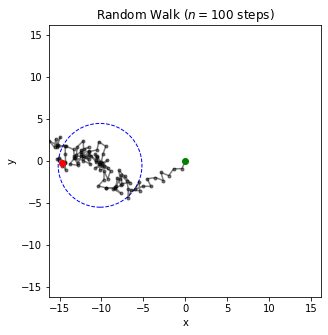

In [3]:
x,y = random_walk(100)
plot_walk(x,y)

## Small statistical analysis
- The rms end-to-end metric is valid for large values of n
- We can see this by calculating the rms metric and comparing it to the 'actual' end-to-end distance
- If we average over many results we can look at the statistics

In [4]:
# Initialise arrays
ns = [10,100,1000,10000]
mean_diffs = []
se_diffs = []

# Loop over the 4 values of n
for n in ns:
    diffs = []
    # Calculate each value 100 times
    for i in range(100):
        # Calculate 'real' e2e distance
        x,y = random_walk(n)
        real_e2e = ((x[-1]-x[0])**2 + (y[-1]-y[0])**2)**0.5
        
        # Calculate rms e2e distance
        rms = calculate_rms_dist(n)
        
        # Calculate the absolute difference
        diff = abs(real_e2e-rms)
        diffs.append(diff)
        
    # For each value of n, calculate its mean difference and standard error
    mean_diff = np.mean(diffs)
    se_diff = np.std(diffs)/100**0.5
    
    mean_diffs.append(mean_diff)
    se_diffs.append(se_diff)
    

Text(0, 0.5, 'Normalised mean of \n |rms e2e - actual e2e|')

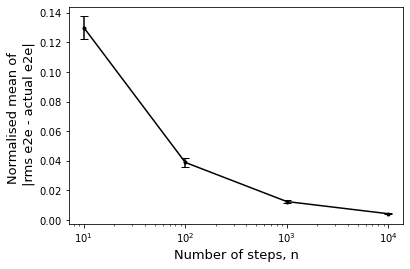

In [5]:
# Plot results
plt.errorbar(ns,np.array(mean_diffs)/np.array(ns),yerr=np.array(se_diffs)/np.array(ns),capsize=4,fmt='k.-')

# Format plot
plt.xscale('log')
plt.xlabel('Number of steps, n',fontsize=13)
plt.ylabel('Normalised mean of \n |rms e2e - actual e2e|',fontsize=13)

## Exercise
1. Write a function to return the Kuhn length of a polymer chain
2. Write a function to plot the Kuhn segments (hint - modify the existing function)
3. Compare the freely-jointed model with the Kuhn-segment model

Extension:
Compare these two models to the more complicated analytical polymer models such as:
-  Excluded Volume (The chain can't 'overlap' anywhere)
-  Rigidity (Limited bond-angles between adjacent segments)
-  Branching 

Many more details [here](https://people.brandeis.edu/~kuntawu/advanced_physics_laboratory/random_Polymer%20Textbook.pdf)